<a href="https://colab.research.google.com/github/vamsisripada/Machine-Learning/blob/main/multivariate_regression_on_50_startups_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# Reading the csv file and loading it.
data = pd.read_csv('50_Startups.csv')

In [6]:
# Gettng to know of the columns
data.columns
     

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
# To know the Datatype, Non-Null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
# To check out the datatypes of each column
data.dtypes
     

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
# Checking whether there are any null values in our data and cleaning if any.
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
# To retrieve the first five rows of the data
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
# To retrieve the last five rows of the data
data.tail()
     

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [13]:
# To find mean, std and etc. for all the columns we use describe() it doesn't consider the string columns
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [14]:
# Checking the shape of the column
data.shape

(50, 5)

In [15]:
data.describe().loc['mean']

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
Name: mean, dtype: float64

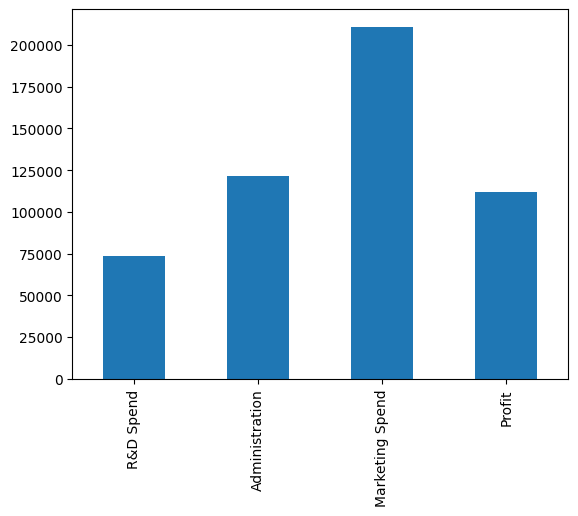

In [16]:
# Plotting a bar graph
data.describe().loc['mean'].plot.bar()
plt.show()

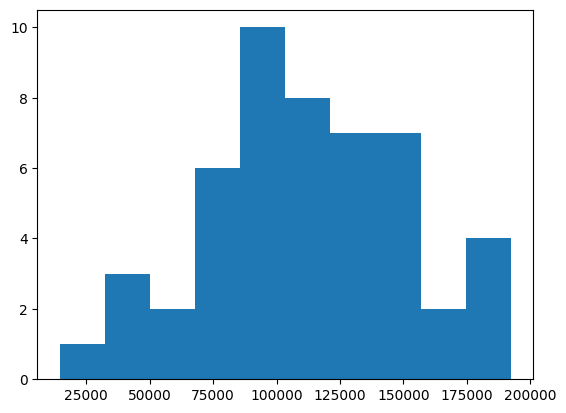

In [17]:
# Plotting a histogram for the Profit column
plt.hist(data['Profit'])
plt.show()

In [19]:
# Looking for a correlation matrix for data
d = data.corr()
d

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [20]:
# Checking the shape of the correlation matrix
d.shape

(4, 4)

<Axes: >

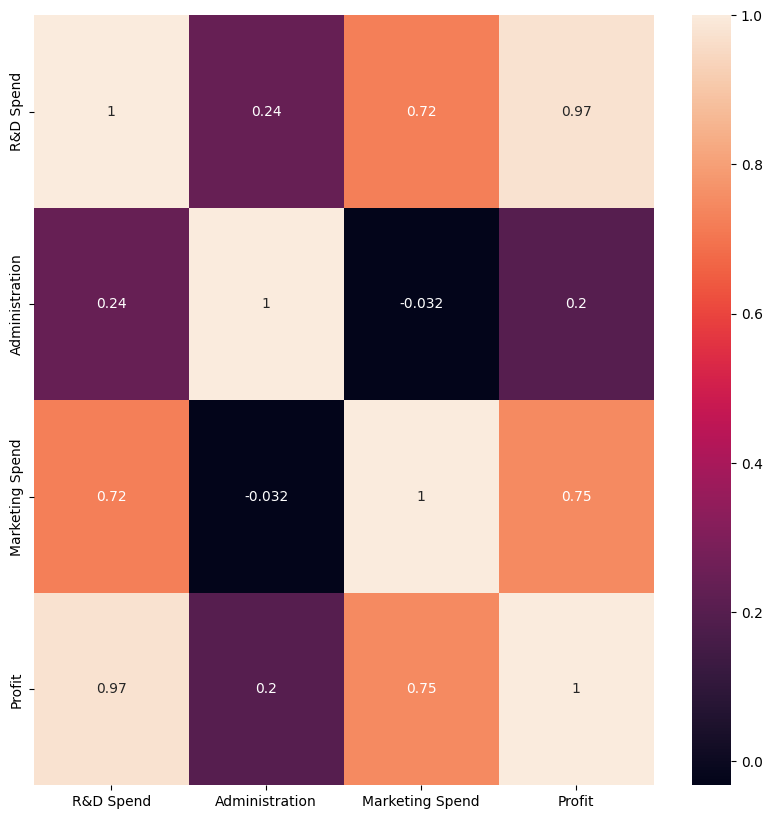

In [22]:
 #Plotting a heatmap for the correlatiion matrix
plt.figure(figsize = (10,10))
sns.heatmap(d,annot = True)
     

In [23]:
# Selecting only the integer columns so that the string columns don't influence the model
# Selecting only integer datatypes using select_dtypes
X = data.iloc[:,:-1]
X = X.select_dtypes(include = np.number)
y = data.iloc[:,-1]

In [25]:
#Looking for the shape of the data
X.shape,y.shape
     

((50, 3), (50,))

In [26]:
# Converting the 1-Dimensional col. to 2-Dim. col.
y = np.array(y)
y = y.reshape(-1,1)

In [27]:

# Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 32)

In [28]:
# Checking the shape of the training data
X_train.shape,y_train.shape

((35, 3), (35, 1))

In [29]:
# Checking the shape of the testing data
X_test.shape,y_test.shape

((15, 3), (15, 1))

In [30]:
# importing the linear_model
# For Uni_variate and Multi_Variate we use linear_model the only difference is in Linear X has a single feature while in Multi it has multiple features

from sklearn import linear_model

In [31]:
#Fitting a regression model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [32]:
# Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')

Performance of the model on training data :

MAE = 5485.293579118111
MSE = 48804147.476301275
RMSE = 6985.996527074808
R_2 = 0.967462433557256


In [33]:
# Evaluating the model on testing data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred2 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 8838.451739639082
MSE = 151507501.20898917
RMSE = 12308.838337105139
R_2 = 0.9065521225506566


In [34]:
# importing Lasso
from sklearn.linear_model import Lasso

In [35]:
#fitting the model
reg = Lasso(alpha = 0.1)
reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [36]:
# Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_predict)}')
print(f'MSE = {mean_squared_error(y_train, y_predict)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_predict))}')
print(f'R_2 = {r2_score(y_train, y_predict)}')

Performance of the model on training data :

MAE = 5485.293578794194
MSE = 48804147.476301216
RMSE = 6985.996527074803
R_2 = 0.967462433557256


In [37]:

# Evaluating the model on testing data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict1 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_predict1)}')
print(f'MSE = {mean_squared_error(y_test, y_predict1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_predict1))}')
print(f'R_2 = {r2_score(y_test, y_predict1)}')

Performance of the model on test data :

MAE = 8838.451741282928
MSE = 151507501.22136527
RMSE = 12308.83833760787
R_2 = 0.9065521225430233


In [38]:
# importing Ridge
from sklearn.linear_model import Ridge

In [39]:
#fitting the model
reg = Ridge(alpha = 0.8)
reg.fit(X_train,y_train)

Ridge(alpha=0.8)

In [40]:
# Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_predict)}')
print(f'MSE = {mean_squared_error(y_train, y_predict)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_predict))}')
print(f'R_2 = {r2_score(y_train, y_predict)}')

Performance of the model on training data :

MAE = 5485.293579117144
MSE = 48804147.47630123
RMSE = 6985.996527074804
R_2 = 0.967462433557256


In [41]:
# Evaluating the model on testing data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict1 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_predict1)}')
print(f'MSE = {mean_squared_error(y_test, y_predict1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_predict1))}')
print(f'R_2 = {r2_score(y_test, y_predict1)}')

Performance of the model on test data :

MAE = 8838.451739615055
MSE = 151507501.20981497
RMSE = 12308.838337138683
R_2 = 0.9065521225501474
